In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:xlabel='Age', ylabel='Density'>

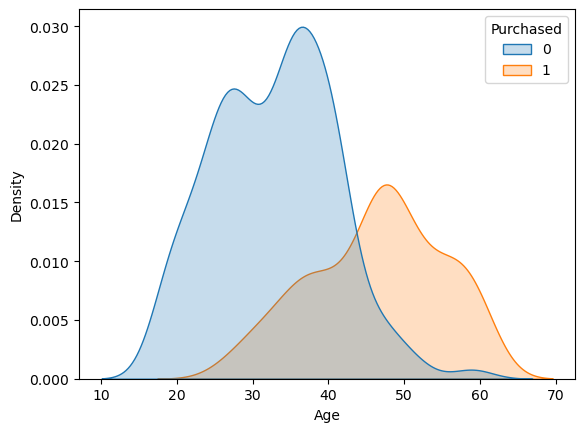

In [4]:
sns.kdeplot(data=df, x='Age', hue="Purchased", fill=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

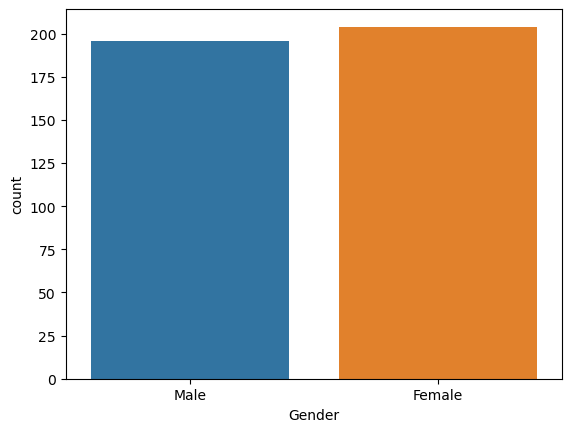

In [5]:
sns.countplot(data=df, x='Gender')

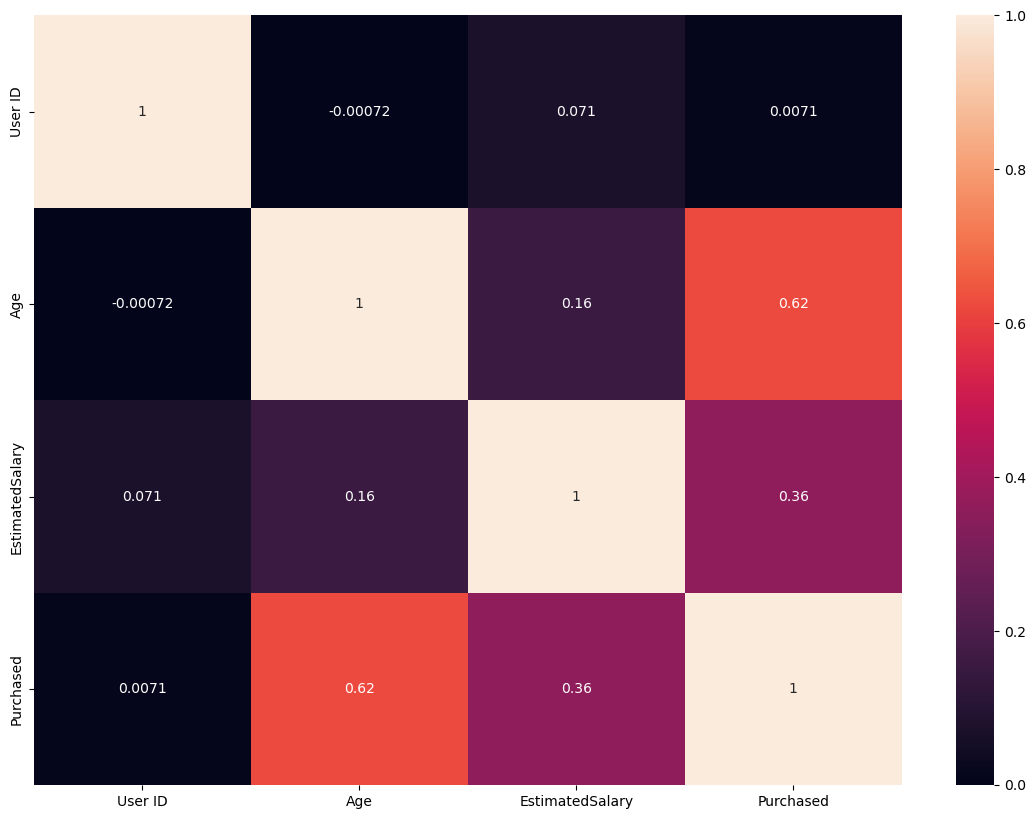

In [6]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

### {'male':1,'female':0}

In [9]:
df['Gender'] = le.fit_transform(df['Gender'])

In [10]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [11]:
X = df.drop(columns = ['User ID','Purchased'],axis=1)
y = df['Purchased']

In [12]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [13]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import uniform , randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
svm_model = SVC()
rf_model = RandomForestClassifier()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(400, 3) (320, 3) (80, 3)
(400,) (320,) (80,)


# Support Vector Classifier

In [16]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_accuracy = svc_model.score(X_test, y_test)
print("SVC Accuracy:", svc_accuracy)

SVC Accuracy: 0.825


# Logistic Regression


In [17]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_accuracy = logreg_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.725


# Random Forest

In [18]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9375


# Standard and MinMax

In [19]:
scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.transform(X_test)

In [20]:
scaler2 = MinMaxScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

# SVC

In [21]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'auto']
}

param_rand = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(uniform(0.1, 1).rvs(5))
}

# Standard, Grid, SVC

In [22]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

In [23]:
grid_search.fit(X_train_scaled1, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [24]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [25]:
best_model = grid_search.best_estimator_

In [26]:
accuracy = best_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


# Standard, Random, SVC

In [27]:
random_search = RandomizedSearchCV(svm_model, param_rand, n_iter=10, cv=5)

In [28]:
random_search.fit(X_train_scaled1, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000136AF990640>,
                                        'gamma': ['scale', 'auto',
                                                  1.02052987662207,
                                                  0.5563518150045319,
                                                  1.0091144868594706,
                                                  0.2850628223967143,
                                                  1.03375707343878],
                                        'kernel': ['linear', 'rbf', 'poly']})

In [29]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'C': 2.0510530604277064, 'gamma': 0.5563518150045319, 'kernel': 'rbf'}


In [30]:
best_model = random_search.best_estimator_

In [31]:
accuracy = best_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


# MinMax, Grid, SVC

In [32]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

In [33]:
grid_search.fit(X_train_scaled2, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [34]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [35]:
best_model = grid_search.best_estimator_

In [36]:
accuracy = best_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


# MinMax, Random, SVC

In [37]:
random_search = RandomizedSearchCV(svm_model, param_rand, n_iter=10, cv=5)

In [38]:
random_search.fit(X_train_scaled2, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000136AF990640>,
                                        'gamma': ['scale', 'auto',
                                                  1.02052987662207,
                                                  0.5563518150045319,
                                                  1.0091144868594706,
                                                  0.2850628223967143,
                                                  1.03375707343878],
                                        'kernel': ['linear', 'rbf', 'poly']})

In [39]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'C': 6.767307097580046, 'gamma': 'scale', 'kernel': 'poly'}


In [40]:
best_model = random_search.best_estimator_

In [41]:
accuracy = best_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


# Logistic Regression

In [42]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        
    'penalty': ['l1', 'l2'],                    
    'solver': ['liblinear', 'lbfgs', 'newton-cg'] 
}

param_rand = {
    'C': uniform(0.001, 100),         
    'penalty': ['l1', 'l2'],          
    'solver': ['liblinear', 'lbfgs']  
}

# Standard, Grid, Logistic Regression

In [43]:
grid_search = GridSearchCV(lr_model, param_grid, cv=5)

In [44]:
grid_search.fit(X_train_scaled1, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']})

In [45]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [46]:
best_logreg_model = grid_search.best_estimator_

In [47]:
accuracy = best_logreg_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9125


# Standard, Random, Logistic Regression

In [48]:
random_search = RandomizedSearchCV(lr_model, param_rand, n_iter=10, cv=5)

In [49]:
random_search.fit(X_train_scaled1, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000136A1125160>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs']})

In [50]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'C': 85.7734548782129, 'penalty': 'l2', 'solver': 'liblinear'}


In [51]:
best_logreg_model = random_search.best_estimator_

In [52]:
accuracy = best_logreg_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.925


# MinMax, Grid, Logistic Regression

In [53]:
grid_search = GridSearchCV(lr_model, param_grid, cv=5)

In [54]:
grid_search.fit(X_train_scaled2, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']})

In [55]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [56]:
best_logreg_model = grid_search.best_estimator_

In [57]:
accuracy = best_logreg_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9125


# MinMax, Random, Logistic Regression

In [58]:
random_search = RandomizedSearchCV(lr_model, param_rand, n_iter=10, cv=5)

In [59]:
random_search.fit(X_train_scaled2, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000136A1125160>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs']})

In [60]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'C': 16.428763907443205, 'penalty': 'l2', 'solver': 'liblinear'}


In [61]:
best_logreg_model = random_search.best_estimator_

In [62]:
accuracy = best_logreg_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9125


# Random Forest

In [63]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_rand = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Standard, Grid, Random Forest

In [64]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

In [65]:
grid_search.fit(X_train_scaled1, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [66]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [67]:
best_rf_model = grid_search.best_estimator_

In [68]:
accuracy = best_rf_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


# Standard, Random, Random Forest

In [69]:
random_search = RandomizedSearchCV(rf_model, param_rand, n_iter=10, cv=5)

In [70]:
random_search.fit(X_train_scaled1, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000136B0A2E730>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000136B0A1E640>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000136B0A1F0A0>})

In [71]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 113}


In [72]:
best_rf_model = random_search.best_estimator_

In [73]:
accuracy = best_rf_model.score(X_test_scaled1, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


# MinMax, Grid, Random Forest

In [74]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

In [75]:
grid_search.fit(X_train_scaled2, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [76]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [77]:
best_rf_model = grid_search.best_estimator_

In [78]:
accuracy = best_rf_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


# MinMax, Random, Random Forest

In [79]:
random_search = RandomizedSearchCV(rf_model, param_rand, n_iter=10, cv=5)

In [80]:
random_search.fit(X_train_scaled2, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000136B0A2E730>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000136B0A1E640>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000136B0A1F0A0>})

In [81]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 194}


In [82]:
best_rf_model = random_search.best_estimator_

In [83]:
accuracy = best_rf_model.score(X_test_scaled2, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95
